In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2021-01-27'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nb_train = 5000
nb_test = 100
krnlinit = 'rdn'
nblay = 3
nbclust = 4
filt = 2

# Spatial Jitter only on the classification

In [3]:
def makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic):
    if pooling:
        hotshom = poolingnetwork(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    else:
        hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{krnlinit}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}_{jitonic}'
    fname_model = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{krnlinit}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}_model.pkl'
    print(fname_model)
    if not os.path.isfile(fname_model):
        loaderhom, order = hotshom.learningall(dataset=dataset)
        with open(fname_model, 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname_model, 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()
    for homeo in [False,True]:
        for i in range(len(hotshom.L)):
            hotshom.L[i].homeo=homeo
        if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}_{homeo}.pkl'):       
            trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_train, jitonic=jitonic)
            testmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_test, jitonic=jitonic)
            with open(fname+f'_histo_{nb_train}_{nb_test}_{homeo}.pkl', 'wb') as file:
                pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
        else:
            with open(fname+f'_histo_{nb_train}_{nb_test}_{homeo}.pkl', 'rb') as file:
                trainmaphom, testmaphom = pickle.load(file)
        histoscore(trainmaphom,testmaphom)
    return hotshom, loaderhom, order, trainmaphom, testmaphom

../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


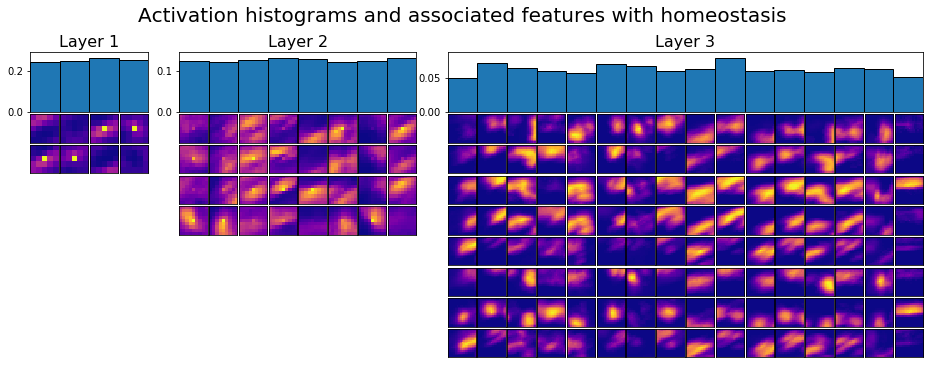

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 78.0% - eucli = 72.0% - norm = 73.0%
Classification scores with kNN: 3-NN = 72.0% - 6-NN = 71.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 78.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 81.0% - eucli = 80.0% - norm = 80.0%
Classification scores with kNN: 3-NN = 77.0% - 6-NN = 74.0%
Classification scores with entropy: Kullback-Leibler = 82.0% - Jensen-Shannon = 81.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


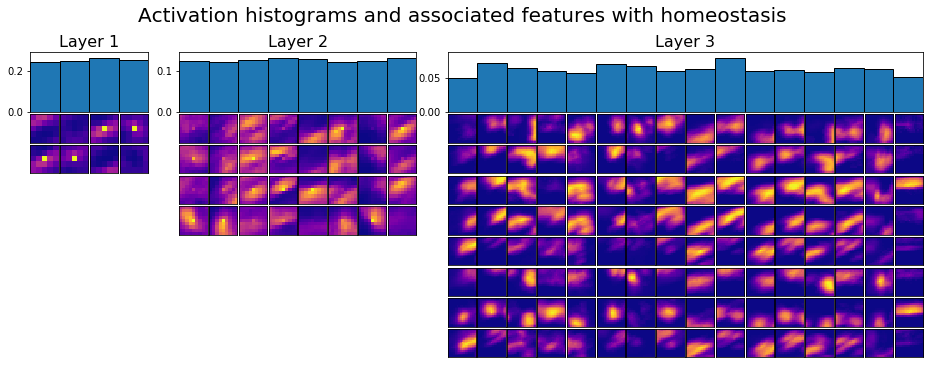

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 65.0% - eucli = 59.0% - norm = 60.0%
Classification scores with kNN: 3-NN = 57.99999999999999% - 6-NN = 62.0%
Classification scores with entropy: Kullback-Leibler = 59.0% - Jensen-Shannon = 65.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 79.0% - eucli = 79.0% - norm = 79.0%
Classification scores with kNN: 3-NN = 78.0% - 6-NN = 79.0%
Classification scores with entropy: Kullback-Leibler = 79.0% - Jensen-Shannon = 79.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


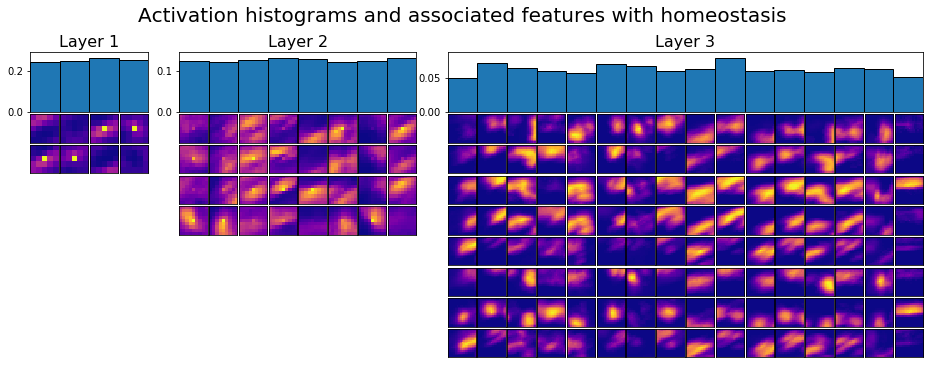

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 65.0% - eucli = 68.0% - norm = 64.0%
Classification scores with kNN: 3-NN = 65.0% - 6-NN = 63.0%
Classification scores with entropy: Kullback-Leibler = 67.0% - Jensen-Shannon = 64.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 80.0% - eucli = 83.0% - norm = 83.0%
Classification scores with kNN: 3-NN = 80.0% - 6-NN = 79.0%
Classification scores with entropy: Kullback-Leibler = 80.0% - Jensen-Shannon = 80.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


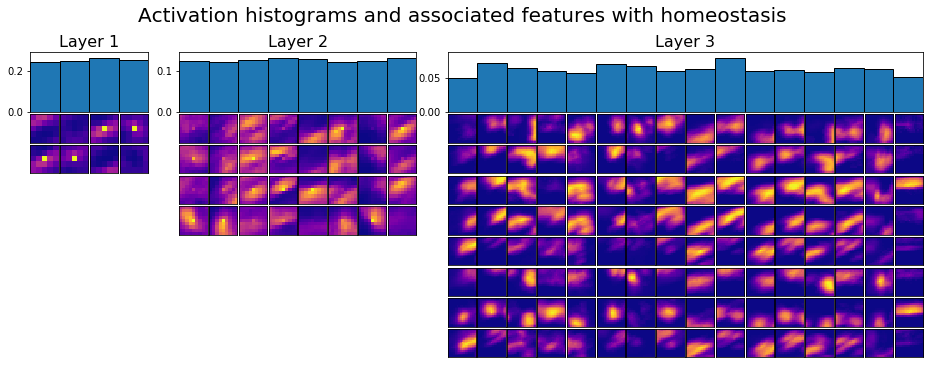

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 67.0% - eucli = 55.00000000000001% - norm = 53.0%
Classification scores with kNN: 3-NN = 53.0% - 6-NN = 55.00000000000001%
Classification scores with entropy: Kullback-Leibler = 67.0% - Jensen-Shannon = 66.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 70.0% - eucli = 69.0% - norm = 70.0%
Classification scores with kNN: 3-NN = 72.0% - 6-NN = 76.0%
Classification scores with entropy: Kullback-Leibler = 71.0% - Jensen-Shannon = 70.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


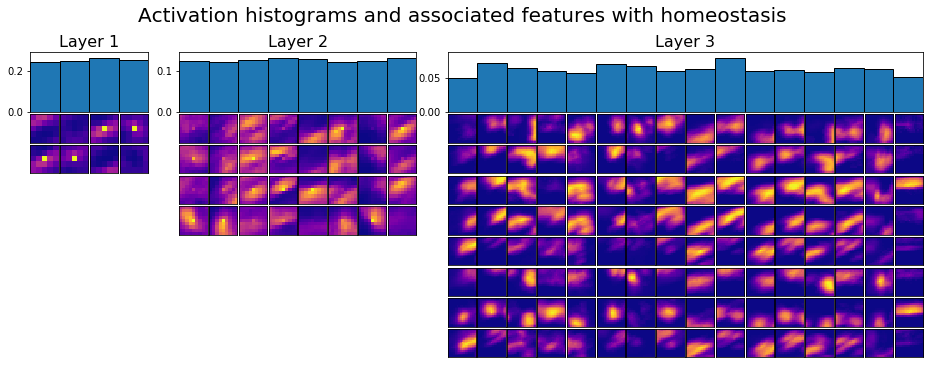

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 61.0% - eucli = 52.0% - norm = 50.0%
Classification scores with kNN: 3-NN = 48.0% - 6-NN = 54.0%
Classification scores with entropy: Kullback-Leibler = 57.99999999999999% - Jensen-Shannon = 61.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 68.0% - eucli = 69.0% - norm = 69.0%
Classification scores with kNN: 3-NN = 69.0% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 69.0% - Jensen-Shannon = 68.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


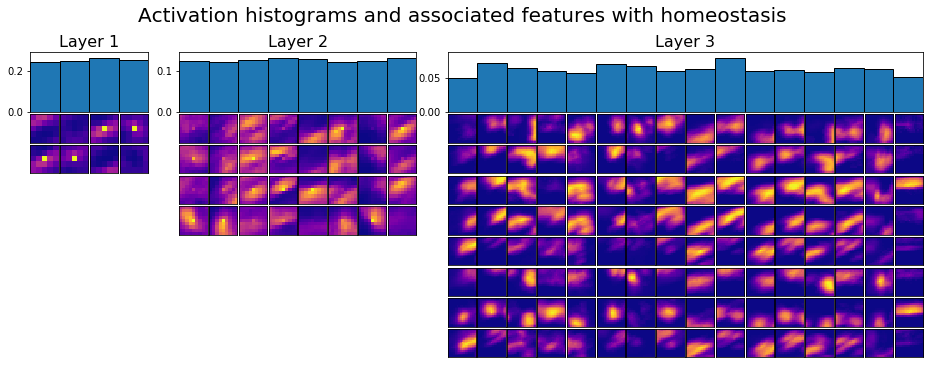

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 66.0% - eucli = 66.0% - norm = 67.0%
Classification scores with kNN: 3-NN = 64.0% - 6-NN = 57.99999999999999%
Classification scores with entropy: Kullback-Leibler = 66.0% - Jensen-Shannon = 66.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 73.0% - eucli = 75.0% - norm = 75.0%
Classification scores with kNN: 3-NN = 78.0% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 74.0% - Jensen-Shannon = 73.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


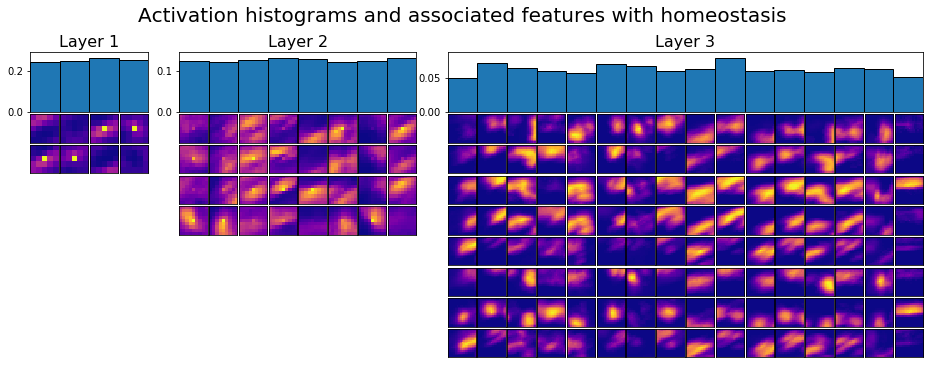

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 56.99999999999999% - eucli = 47.0% - norm = 47.0%
Classification scores with kNN: 3-NN = 49.0% - 6-NN = 47.0%
Classification scores with entropy: Kullback-Leibler = 56.00000000000001% - Jensen-Shannon = 57.99999999999999%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 77.0% - eucli = 80.0% - norm = 80.0%
Classification scores with kNN: 3-NN = 79.0% - 6-NN = 77.0%
Classification scores with entropy: Kullback-Leibler = 77.0% - Jensen-Shannon = 77.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_mo

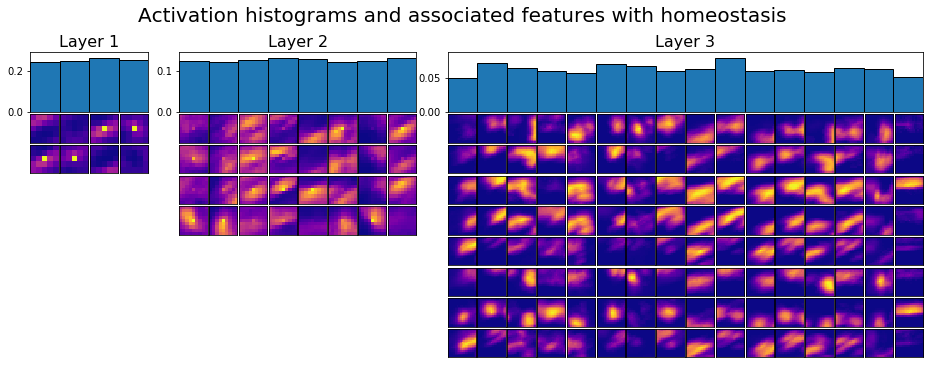

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 50.0% - eucli = 50.0% - norm = 48.0%
Classification scores with kNN: 3-NN = 50.0% - 6-NN = 53.0%
Classification scores with entropy: Kullback-Leibler = 55.00000000000001% - Jensen-Shannon = 49.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 63.0% - eucli = 68.0% - norm = 69.0%
Classification scores with kNN: 3-NN = 70.0% - 6-NN = 72.0%
Classification scores with entropy: Kullback-Leibler = 63.0% - Jensen-Shannon = 63.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


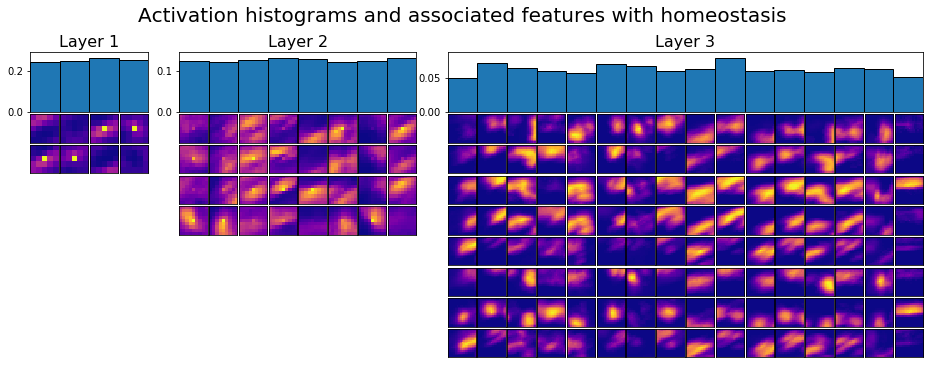

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 56.00000000000001% - eucli = 42.0% - norm = 42.0%
Classification scores with kNN: 3-NN = 44.0% - 6-NN = 46.0%
Classification scores with entropy: Kullback-Leibler = 54.0% - Jensen-Shannon = 56.00000000000001%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 78.0% - eucli = 77.0% - norm = 77.0%
Classification scores with kNN: 3-NN = 75.0% - 6-NN = 76.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 78.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


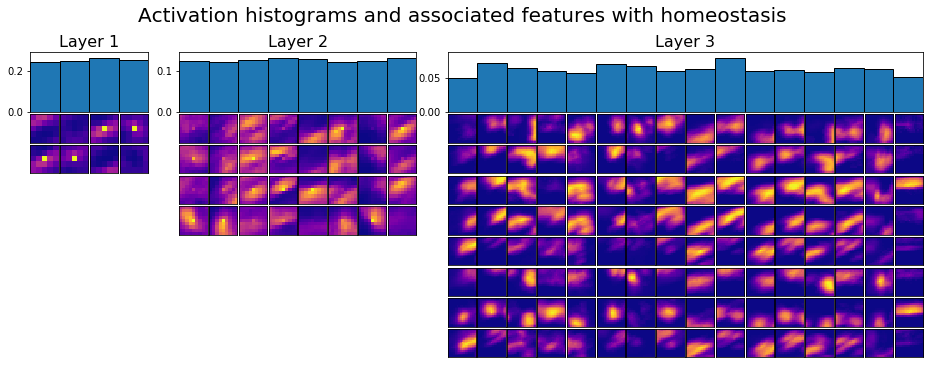

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 55.00000000000001% - eucli = 51.0% - norm = 51.0%
Classification scores with kNN: 3-NN = 56.00000000000001% - 6-NN = 48.0%
Classification scores with entropy: Kullback-Leibler = 56.99999999999999% - Jensen-Shannon = 55.00000000000001%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 76.0% - eucli = 78.0% - norm = 77.0%
Classification scores with kNN: 3-NN = 78.0% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 77.0% - Jensen-Shannon = 76.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_F

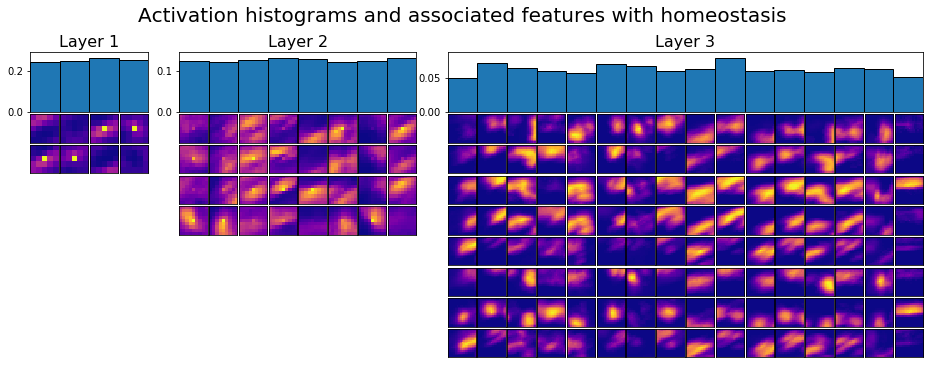

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 56.99999999999999% - eucli = 56.00000000000001% - norm = 56.00000000000001%
Classification scores with kNN: 3-NN = 53.0% - 6-NN = 54.0%
Classification scores with entropy: Kullback-Leibler = 60.0% - Jensen-Shannon = 56.00000000000001%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 68.0% - eucli = 69.0% - norm = 69.0%
Classification scores with kNN: 3-NN = 65.0% - 6-NN = 74.0%
Classification scores with entropy: Kullback-Leibler = 68.0% - Jensen-Shannon = 68.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_F

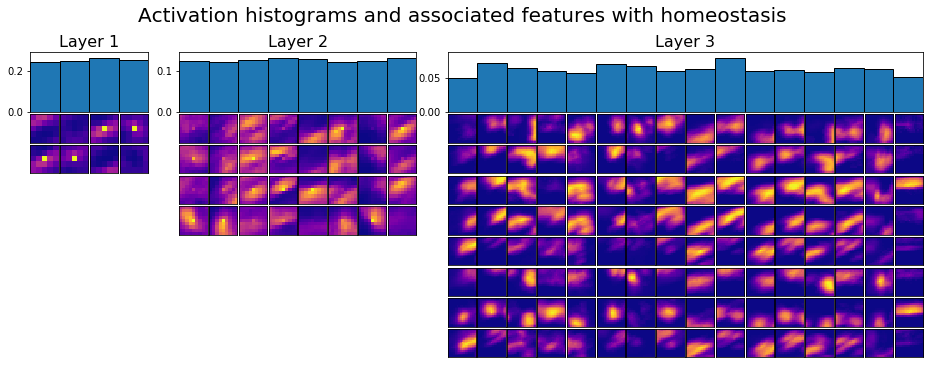

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 44.0% - eucli = 44.0% - norm = 44.0%
Classification scores with kNN: 3-NN = 44.0% - 6-NN = 51.0%
Classification scores with entropy: Kullback-Leibler = 43.0% - Jensen-Shannon = 44.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 67.0% - eucli = 65.0% - norm = 66.0%
Classification scores with kNN: 3-NN = 67.0% - 6-NN = 69.0%
Classification scores with entropy: Kullback-Leibler = 67.0% - Jensen-Shannon = 67.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


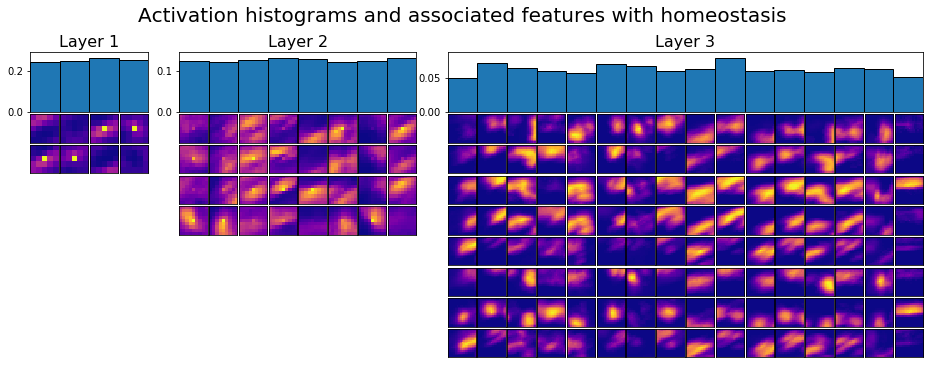

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 56.00000000000001% - eucli = 46.0% - norm = 48.0%
Classification scores with kNN: 3-NN = 50.0% - 6-NN = 47.0%
Classification scores with entropy: Kullback-Leibler = 56.99999999999999% - Jensen-Shannon = 57.99999999999999%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 64.0% - eucli = 68.0% - norm = 68.0%
Classification scores with kNN: 3-NN = 66.0% - 6-NN = 70.0%
Classification scores with entropy: Kullback-Leibler = 63.0% - Jensen-Shannon = 64.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_mo

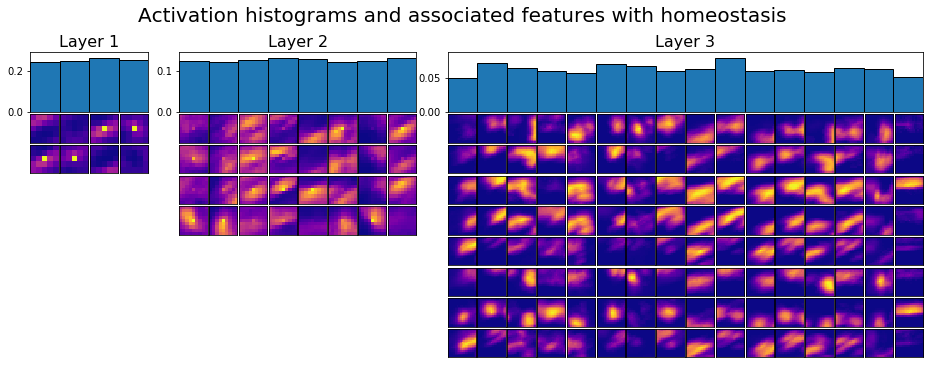

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 38.0% - eucli = 39.0% - norm = 40.0%
Classification scores with kNN: 3-NN = 39.0% - 6-NN = 49.0%
Classification scores with entropy: Kullback-Leibler = 37.0% - Jensen-Shannon = 38.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 57.99999999999999% - eucli = 65.0% - norm = 65.0%
Classification scores with kNN: 3-NN = 64.0% - 6-NN = 66.0%
Classification scores with entropy: Kullback-Leibler = 57.99999999999999% - Jensen-Shannon = 57.99999999999999%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_mo

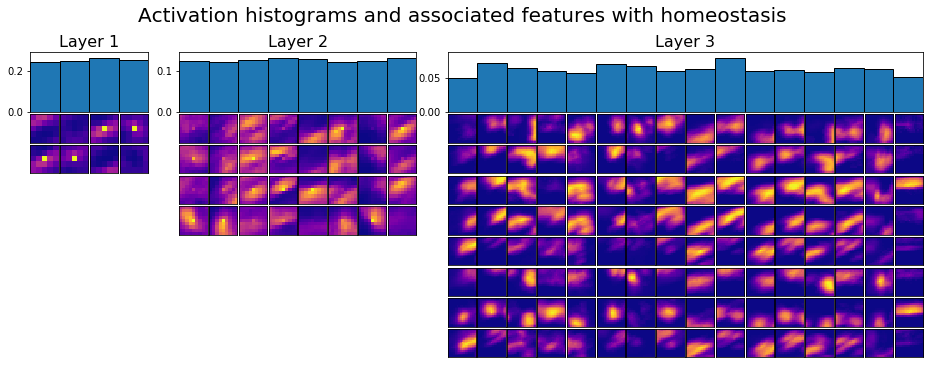

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 48.0% - eucli = 44.0% - norm = 43.0%
Classification scores with kNN: 3-NN = 48.0% - 6-NN = 54.0%
Classification scores with entropy: Kullback-Leibler = 49.0% - Jensen-Shannon = 48.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 62.0% - eucli = 64.0% - norm = 64.0%
Classification scores with kNN: 3-NN = 69.0% - 6-NN = 65.0%
Classification scores with entropy: Kullback-Leibler = 61.0% - Jensen-Shannon = 62.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


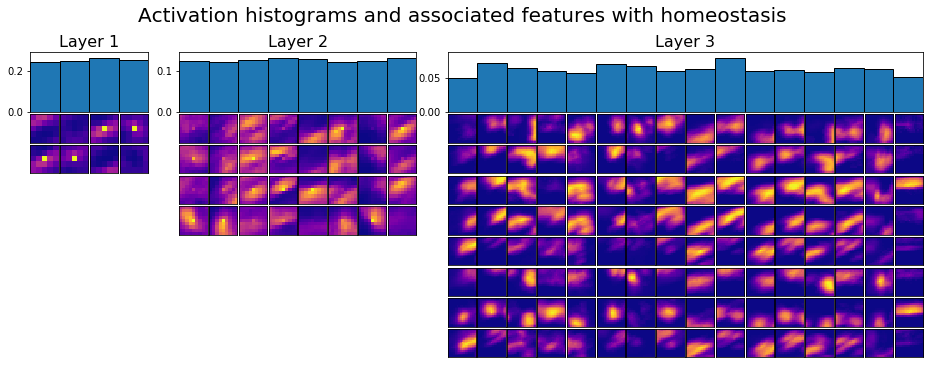

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 52.0% - eucli = 48.0% - norm = 47.0%
Classification scores with kNN: 3-NN = 50.0% - 6-NN = 52.0%
Classification scores with entropy: Kullback-Leibler = 52.0% - Jensen-Shannon = 51.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 66.0% - eucli = 66.0% - norm = 66.0%
Classification scores with kNN: 3-NN = 62.0% - 6-NN = 63.0%
Classification scores with entropy: Kullback-Leibler = 66.0% - Jensen-Shannon = 66.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


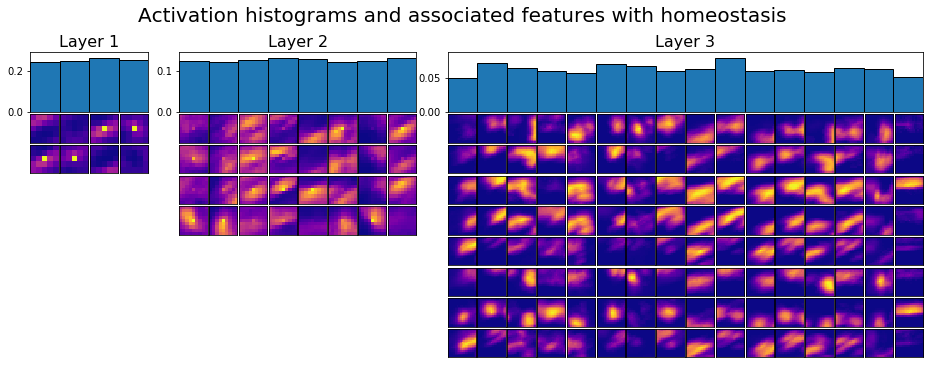

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 47.0% - eucli = 47.0% - norm = 47.0%
Classification scores with kNN: 3-NN = 41.0% - 6-NN = 48.0%
Classification scores with entropy: Kullback-Leibler = 44.0% - Jensen-Shannon = 47.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 59.0% - eucli = 56.00000000000001% - norm = 55.00000000000001%
Classification scores with kNN: 3-NN = 66.0% - 6-NN = 67.0%
Classification scores with entropy: Kullback-Leibler = 59.0% - Jensen-Shannon = 59.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


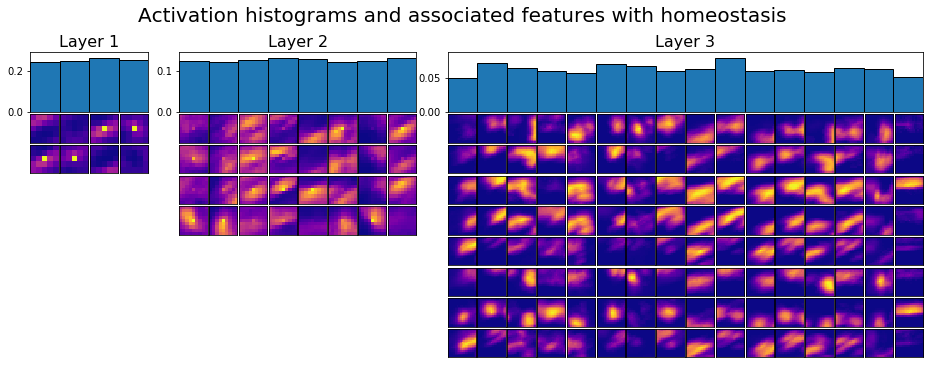

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 42.0% - eucli = 39.0% - norm = 38.0%
Classification scores with kNN: 3-NN = 36.0% - 6-NN = 43.0%
Classification scores with entropy: Kullback-Leibler = 43.0% - Jensen-Shannon = 42.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 67.0% - eucli = 66.0% - norm = 67.0%
Classification scores with kNN: 3-NN = 67.0% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 67.0% - Jensen-Shannon = 67.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


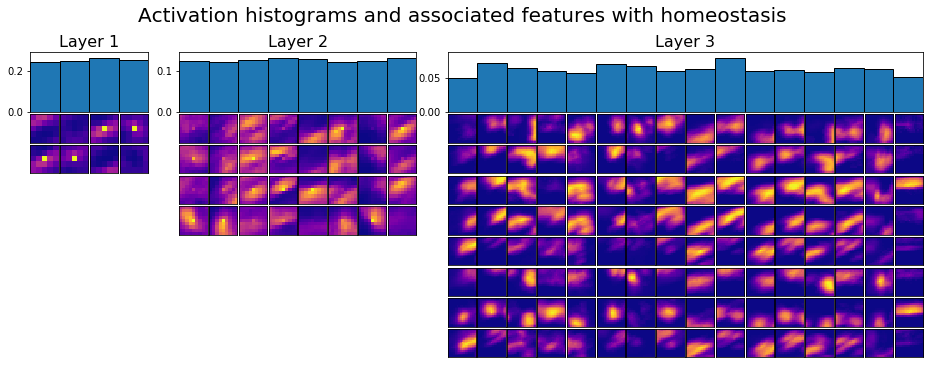

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 52.0% - eucli = 50.0% - norm = 48.0%
Classification scores with kNN: 3-NN = 53.0% - 6-NN = 54.0%
Classification scores with entropy: Kullback-Leibler = 53.0% - Jensen-Shannon = 53.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 68.0% - eucli = 71.0% - norm = 70.0%
Classification scores with kNN: 3-NN = 67.0% - 6-NN = 74.0%
Classification scores with entropy: Kullback-Leibler = 68.0% - Jensen-Shannon = 68.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


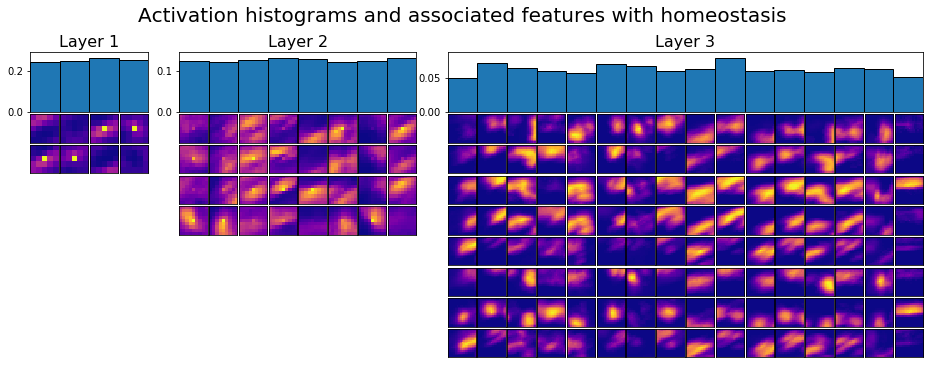

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 45.0% - eucli = 43.0% - norm = 40.0%
Classification scores with kNN: 3-NN = 48.0% - 6-NN = 43.0%
Classification scores with entropy: Kullback-Leibler = 44.0% - Jensen-Shannon = 44.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 72.0% - eucli = 74.0% - norm = 74.0%
Classification scores with kNN: 3-NN = 71.0% - 6-NN = 71.0%
Classification scores with entropy: Kullback-Leibler = 72.0% - Jensen-Shannon = 72.0%
----------------------------------------------------------------------------------------------------


In [4]:
for i in np.arange(0,10,0.5):
    i = round(i,1)
    jitonic = [None,i]
    makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic);

../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


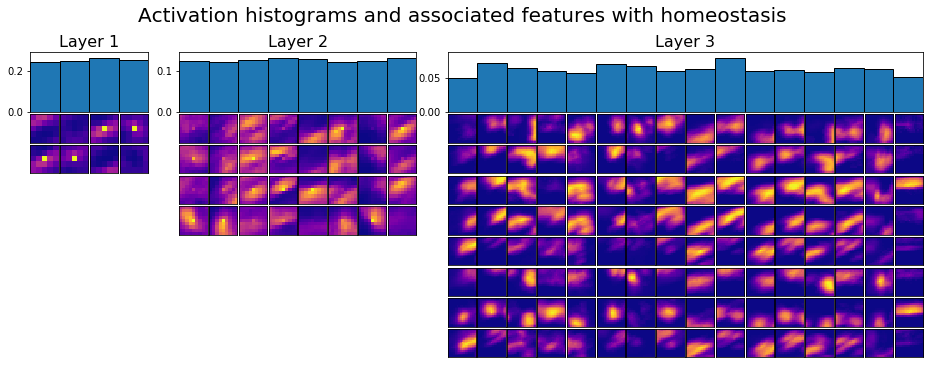

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 75.0% - eucli = 62.0% - norm = 64.0%
Classification scores with kNN: 3-NN = 62.0% - 6-NN = 64.0%
Classification scores with entropy: Kullback-Leibler = 75.0% - Jensen-Shannon = 75.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 74.0% - eucli = 72.0% - norm = 73.0%
Classification scores with kNN: 3-NN = 75.0% - 6-NN = 77.0%
Classification scores with entropy: Kullback-Leibler = 74.0% - Jensen-Shannon = 74.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


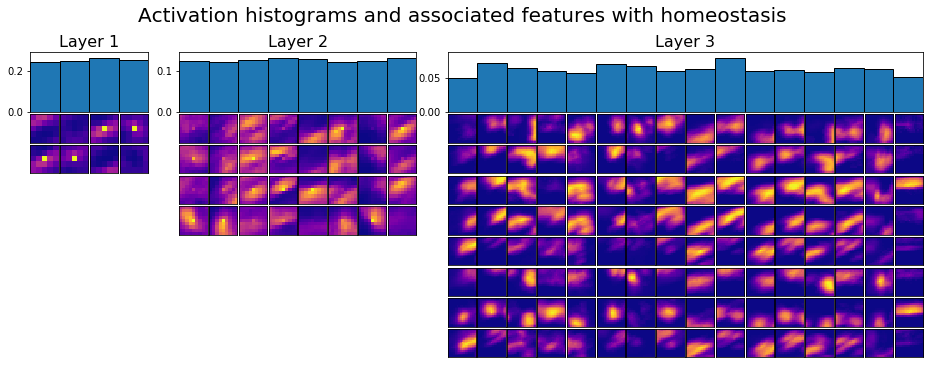

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 77.0% - eucli = 72.0% - norm = 68.0%
Classification scores with kNN: 3-NN = 71.0% - 6-NN = 72.0%
Classification scores with entropy: Kullback-Leibler = 77.0% - Jensen-Shannon = 77.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 79.0% - eucli = 80.0% - norm = 80.0%
Classification scores with kNN: 3-NN = 81.0% - 6-NN = 78.0%
Classification scores with entropy: Kullback-Leibler = 79.0% - Jensen-Shannon = 79.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


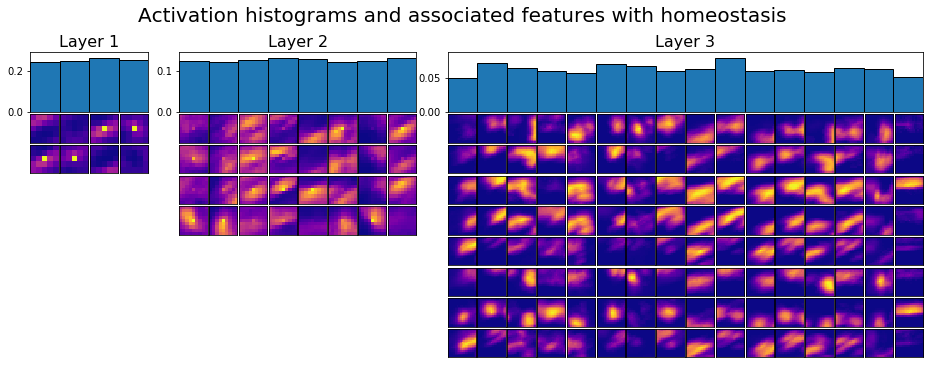

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 71.0% - eucli = 65.0% - norm = 62.0%
Classification scores with kNN: 3-NN = 63.0% - 6-NN = 59.0%
Classification scores with entropy: Kullback-Leibler = 70.0% - Jensen-Shannon = 72.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 80.0% - eucli = 75.0% - norm = 76.0%
Classification scores with kNN: 3-NN = 80.0% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 80.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


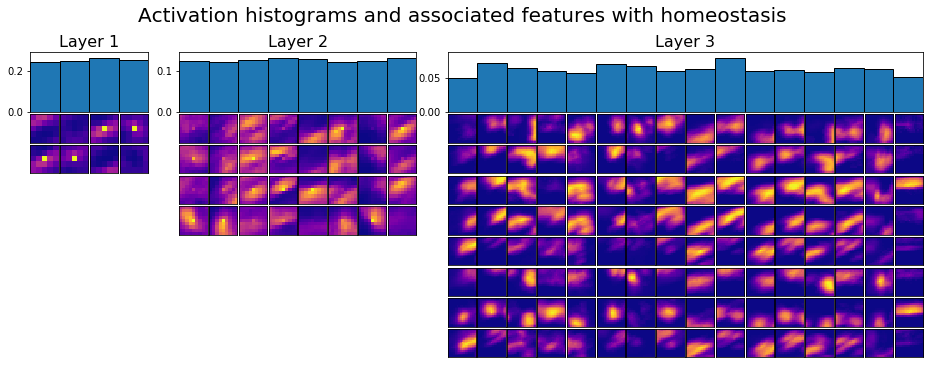

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 73.0% - eucli = 70.0% - norm = 72.0%
Classification scores with kNN: 3-NN = 64.0% - 6-NN = 67.0%
Classification scores with entropy: Kullback-Leibler = 73.0% - Jensen-Shannon = 73.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 82.0% - eucli = 81.0% - norm = 81.0%
Classification scores with kNN: 3-NN = 81.0% - 6-NN = 80.0%
Classification scores with entropy: Kullback-Leibler = 82.0% - Jensen-Shannon = 82.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


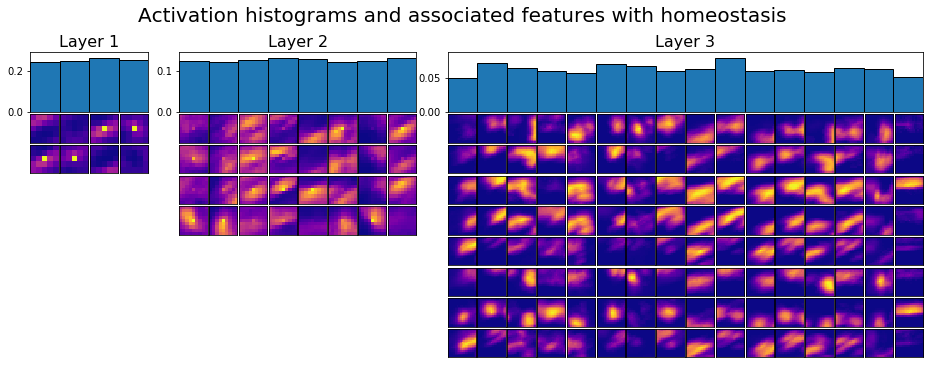

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 74.0% - eucli = 67.0% - norm = 68.0%
Classification scores with kNN: 3-NN = 59.0% - 6-NN = 59.0%
Classification scores with entropy: Kullback-Leibler = 71.0% - Jensen-Shannon = 74.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 79.0% - eucli = 79.0% - norm = 79.0%
Classification scores with kNN: 3-NN = 75.0% - 6-NN = 75.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 79.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


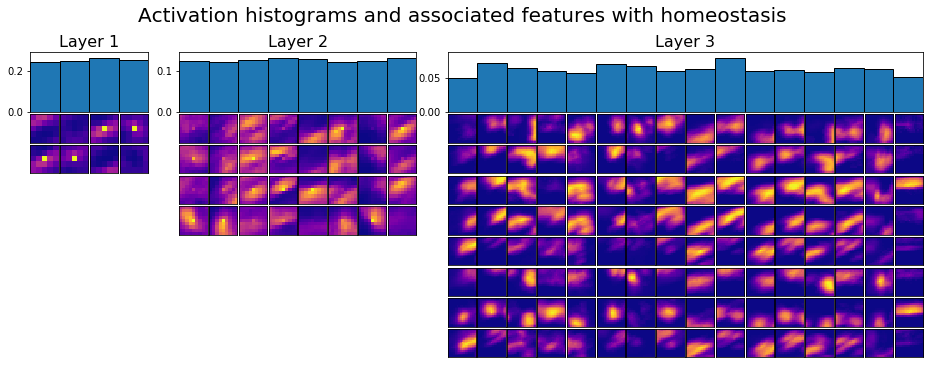

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 66.0% - eucli = 68.0% - norm = 65.0%
Classification scores with kNN: 3-NN = 64.0% - 6-NN = 67.0%
Classification scores with entropy: Kullback-Leibler = 70.0% - Jensen-Shannon = 66.0%
----------------------------------------------------------------------------------------------------
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 79.0% - eucli = 80.0% - norm = 81.0%
Classification scores with kNN: 3-NN = 83.0% - 6-NN = 85.0%
Classification scores with entropy: Kullback-Leibler = 78.0% - Jensen-Shannon = 79.0%
----------------------------------------------------------------------------------------------------


In [5]:
for i in np.arange(0,3000,500):
    i = round(i,1)
    jitonic = [i,None]
    makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic);